In [1]:
import cartopy
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython import display

In [3]:
%matplotlib inline
# %matplotlib notebook

In [4]:
date_rng = pd.date_range('2020-12-01', periods=31, freq='D')

lat = np.arange(-10, -1, 0.5)

lon = np.arange(-42, -36, 0.5)

In [5]:
temp = 15 + 8 * np.random.randn(31, 18, 12)

precip = 10 * np.random.rand(31, 18, 12)

In [6]:
dset = xr.Dataset(
    data_vars={
        'temperature': (('time', 'lat', 'lon'), temp),
        'precipitation': (('time', 'lat', 'lon'), precip),
    },
    coords={
        'time': date_rng,
        'lat': lat,
        'lon': lon
    }
)

In [7]:
dset

<xarray.Dataset>
Dimensions:        (time: 31, lat: 18, lon: 12)
Coordinates:
  * time           (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat            (lat) float64 -10.0 -9.5 -9.0 -8.5 ... -3.0 -2.5 -2.0 -1.5
  * lon            (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -37.5 -37.0 -36.5
Data variables:
    temperature    (time, lat, lon) float64 9.751 21.19 22.39 ... 29.92 9.241
    precipitation  (time, lat, lon) float64 9.537 1.485 8.202 ... 1.346 7.891

In [8]:
dset.to_netcdf("my_dset_saved_on_disk.nc")

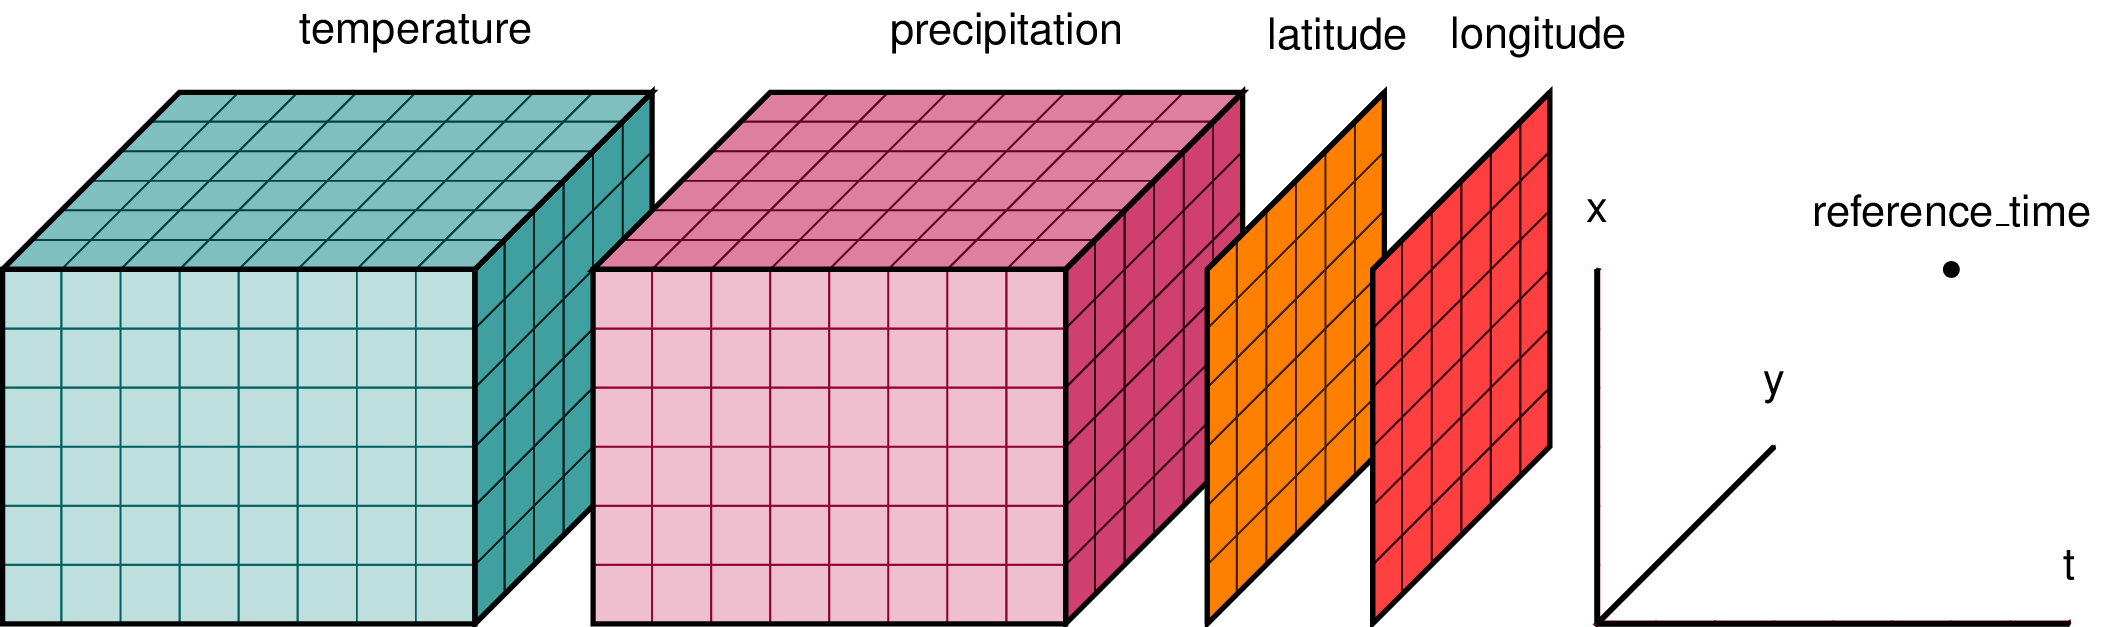

In [9]:
display.Image("https://xarray.pydata.org/en/stable/_images/dataset-diagram.png")

In [10]:
# dset.temperature
my_var = 'temperature'
dset[my_var]

<xarray.DataArray 'temperature' (time: 31, lat: 18, lon: 12)>
array([[[ 9.75139531, 21.19087161, 22.39233554, ..., 19.69019335,
         -0.48434598, 29.90226866],
        [ 3.88426727, 14.21555075, 12.9374464 , ..., 17.81574133,
         11.76472212,  5.28123352],
        [ 4.68053356, 10.24391948, 18.71928231, ..., 18.91754661,
         18.06841917, 26.1451271 ],
        ...,
        [11.9655901 , 12.69987558, 19.01407281, ..., 17.31773027,
         10.56822234, 15.80312174],
        [ 2.12824451, 36.22103608, 17.93947024, ..., 28.8832072 ,
         10.49925146,  0.86245157],
        [16.08292164, 16.75698366,  3.58351885, ...,  1.34545569,
          9.97602134, 19.74006686]],

       [[18.93027392, 11.75211724, 12.9109122 , ..., 24.97275093,
         28.32515637,  3.23953161],
        [21.6242657 , 22.05322029, 16.83257548, ...,  6.6163527 ,
         19.47431756,  8.75393711],
        [16.71332062, 20.19932435, 10.13661089, ..., 11.59814857,
          9.41941174,  4.70270447],
...
        [ 8.66215735,  9.15280856,  0.71375958, ..., 19.35223624,
          2.67493236, 17.76115889],
        [ 7.58541771, 17.64305801, 19.07666698, ...,  3.10712654,
         20.7157565 , -0.17177435],
        [25.9731304 , 15.24368347, 28.27508543, ..., 25.81180586,
          7.46985652, 18.23901038]],

       [[-2.00639663, 14.30440728, 17.08213314, ..., 21.99817832,
          1.08620979, 10.52893863],
        [10.79136289,  8.98607045, 17.87820827, ...,  9.93528306,
         16.64157216, 15.45715138],
        [20.06615604, 33.18210656, 14.7064781 , ..., 13.87672573,
         16.96921025, 21.54705767],
        ...,
        [29.19766369,  6.51026444, 17.29581054, ..., 24.55284023,
         22.31510571,  0.91171299],
        [13.87435789, 31.42534006, 29.79943385, ..., 23.46323333,
         16.53255824,  2.92774112],
        [24.42740172, 25.48606818,  3.23737779, ...,  8.69921616,
         29.9215368 ,  9.24130399]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5

In [11]:
dset['precipitation']

<xarray.DataArray 'precipitation' (time: 31, lat: 18, lon: 12)>
array([[[9.53687945, 1.48488723, 8.20222574, ..., 4.04568453,
         8.24226937, 7.32834097],
        [9.60647302, 2.97878226, 5.91703951, ..., 4.21182131,
         0.71012603, 7.79542365],
        [0.75600712, 5.05774434, 3.12163758, ..., 0.23994438,
         6.59186997, 3.61246074],
        ...,
        [0.63181431, 1.25347348, 5.48056471, ..., 2.21941026,
         9.29306547, 1.43916928],
        [0.83618512, 8.88715225, 2.07844117, ..., 4.42935633,
         3.92192123, 9.50688863],
        [1.75859055, 9.56757311, 2.3477541 , ..., 6.76173724,
         1.16565852, 2.72777748]],

       [[2.22647605, 3.01781139, 8.31451431, ..., 5.16112495,
         0.8609412 , 4.76641711],
        [5.92537576, 1.86800291, 2.77670559, ..., 0.86164818,
         3.80309176, 9.21896508],
        [1.37075598, 4.68263088, 5.45187821, ..., 7.87415896,
         1.46523901, 2.61573216],
...
        [3.82707254, 9.01364307, 2.05083756, ..., 0.73217051,
         5.50972102, 1.17380984],
        [5.44494972, 1.22575435, 3.32111975, ..., 1.6535527 ,
         7.24203568, 2.96770466],
        [5.3932054 , 9.84142471, 5.68251384, ..., 6.80623761,
         4.35042764, 1.45943135]],

       [[0.49902422, 2.41484075, 3.72674434, ..., 3.44762072,
         1.68716928, 9.28324411],
        [8.41056422, 7.19038869, 8.13209232, ..., 7.19645361,
         1.16706374, 9.39613717],
        [8.02970746, 7.82264308, 0.59980704, ..., 4.22538749,
         2.68774137, 1.03684347],
        ...,
        [8.11205724, 2.0884736 , 5.31906434, ..., 9.91619683,
         3.31380134, 3.04571754],
        [8.60871553, 7.39280489, 6.08976897, ..., 5.47105906,
         1.0571545 , 7.42397124],
        [7.09076429, 9.71143176, 5.67501169, ..., 9.55910771,
         1.3461535 , 7.8907469 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5

In [12]:
dset.data_vars

Data variables:
    temperature    (time, lat, lon) float64 9.751 21.19 22.39 ... 29.92 9.241
    precipitation  (time, lat, lon) float64 9.537 1.485 8.202 ... 1.346 7.891

In [13]:
dset.coords

Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5

In [14]:
dset.attrs

{}

In [15]:
dset.attrs['title'] = 'Example Attribute'
dset.attrs

{'title': 'Example Attribute'}

In [16]:
dset.attrs['Centre'] = 'FUNCEME'
dset.attrs

{'title': 'Example Attribute', 'Centre': 'FUNCEME'}

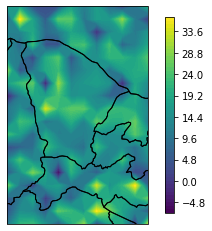

In [17]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

plt.contourf(
    dset.lon,
    dset.lat,
    dset['temperature'].isel(time=0),
    60,
    transform=cartopy.crs.PlateCarree()
)

# contorno dos estados

states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
    )
ax.add_feature(states, edgecolor='k')

# contorno dos países

countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
    )
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9)

plt.show()

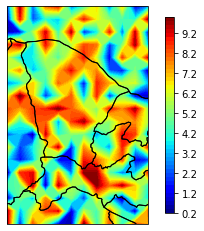

In [18]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

plt.contourf(
    dset.lon,
    dset.lat,
    dset['precipitation'].isel(time=0),
    60,
    transform=cartopy.crs.PlateCarree(),
    cmap=plt.cm.jet
)

# contorno dos estados

states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
    )
ax.add_feature(states, edgecolor='k')

# contorno dos países

countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
    )
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.9)

plt.show()

In [19]:
dset = dset.rename({"temperature": "t2m", "precipitation": "pr"})

dset.data_vars

Data variables:
    t2m      (time, lat, lon) float64 9.751 21.19 22.39 ... 8.699 29.92 9.241
    pr       (time, lat, lon) float64 9.537 1.485 8.202 ... 9.559 1.346 7.891

In [20]:
dset.t2m

<xarray.DataArray 't2m' (time: 31, lat: 18, lon: 12)>
array([[[ 9.75139531, 21.19087161, 22.39233554, ..., 19.69019335,
         -0.48434598, 29.90226866],
        [ 3.88426727, 14.21555075, 12.9374464 , ..., 17.81574133,
         11.76472212,  5.28123352],
        [ 4.68053356, 10.24391948, 18.71928231, ..., 18.91754661,
         18.06841917, 26.1451271 ],
        ...,
        [11.9655901 , 12.69987558, 19.01407281, ..., 17.31773027,
         10.56822234, 15.80312174],
        [ 2.12824451, 36.22103608, 17.93947024, ..., 28.8832072 ,
         10.49925146,  0.86245157],
        [16.08292164, 16.75698366,  3.58351885, ...,  1.34545569,
          9.97602134, 19.74006686]],

       [[18.93027392, 11.75211724, 12.9109122 , ..., 24.97275093,
         28.32515637,  3.23953161],
        [21.6242657 , 22.05322029, 16.83257548, ...,  6.6163527 ,
         19.47431756,  8.75393711],
        [16.71332062, 20.19932435, 10.13661089, ..., 11.59814857,
          9.41941174,  4.70270447],
...
        [ 8.66215735,  9.15280856,  0.71375958, ..., 19.35223624,
          2.67493236, 17.76115889],
        [ 7.58541771, 17.64305801, 19.07666698, ...,  3.10712654,
         20.7157565 , -0.17177435],
        [25.9731304 , 15.24368347, 28.27508543, ..., 25.81180586,
          7.46985652, 18.23901038]],

       [[-2.00639663, 14.30440728, 17.08213314, ..., 21.99817832,
          1.08620979, 10.52893863],
        [10.79136289,  8.98607045, 17.87820827, ...,  9.93528306,
         16.64157216, 15.45715138],
        [20.06615604, 33.18210656, 14.7064781 , ..., 13.87672573,
         16.96921025, 21.54705767],
        ...,
        [29.19766369,  6.51026444, 17.29581054, ..., 24.55284023,
         22.31510571,  0.91171299],
        [13.87435789, 31.42534006, 29.79943385, ..., 23.46323333,
         16.53255824,  2.92774112],
        [24.42740172, 25.48606818,  3.23737779, ...,  8.69921616,
         29.9215368 ,  9.24130399]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5

In [21]:
dset = dset.drop_vars("t2m")
dset

<xarray.Dataset>
Dimensions:  (time: 31, lat: 18, lon: 12)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-01 2020-12-02 ... 2020-12-31
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5
Data variables:
    pr       (time, lat, lon) float64 9.537 1.485 8.202 ... 9.559 1.346 7.891
Attributes:
    title:    Example Attribute
    Centre:   FUNCEME

In [22]:
# Qualquer variável que utilize essa dimensão é descartada.
dset = dset.drop_dims("time")
dset

<xarray.Dataset>
Dimensions:  (lat: 18, lon: 12)
Coordinates:
  * lat      (lat) float64 -10.0 -9.5 -9.0 -8.5 -8.0 ... -3.0 -2.5 -2.0 -1.5
  * lon      (lon) float64 -42.0 -41.5 -41.0 -40.5 ... -38.0 -37.5 -37.0 -36.5
Data variables:
    *empty*
Attributes:
    title:    Example Attribute
    Centre:   FUNCEME

# Exercício: (20 minutos)

### 1. Crie um DataArray com valores aleatórios de precipitação, coordenadas geográficas sobre a região Nordeste do Brasil e com frequência diária de apenas um passo de tempo (2021-03-01).

### 2. Crie um DataSet com valores aleatórios de precipitação e temperatura, coordenadas geográficas sobre a região Sul do Brasil e com frequência diária para todo o mês de Março de 2019.